# Sector 10 - `eleanor-lite`

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
data = get_output('../outputs/test10.txt')
print(len(data))
#metadata = pd.read_csv('/storage/astro2/phrdhx/eleanor_copies/sector6lookup.csv')
#print(len(metadata[metadata.Magnitude < 13]))

155676


In [3]:
len_before = len(data)
data = data[data.transit_prob == 'maybeTransit']
print(len(data), f"after maybeTransit, {round(len(data)/len_before,3)*100}% candidates remain")
data.head()

42448 after maybeTransit, 27.3% candidates remain


path    TIC_ID   signal  \
23  /storage/astro2/phrdhx/s10test/0000/6787/3070/...  67873070 -8.44170   
26  /storage/astro2/phrdhx/s10test/0000/1544/5488/...  15445488 -5.90197   
27  /storage/astro2/phrdhx/s10test/0000/0946/5085/...   9465085 -6.17175   
28  /storage/astro2/phrdhx/s10test/0000/4589/3843/...  45893843 -7.49343   
30  /storage/astro2/phrdhx/s10test/0000/2343/3788/...  23433788 -4.90918   

        snr        time  asym_score  amplitude    width  skewness  \
23 -2.59769  1578.26462     1.00923    0.00413  0.27671   1.69906   
26 -4.43870  1594.41082     1.10058    0.00609  0.10548   3.43810   
27 -4.71280  1592.70382     1.03844    0.00297  0.04666  -1.69862   
28 -4.78364  1572.72117     1.12724    0.01233  0.99966 -30.00000   
30 -3.43937  1593.07766     1.26029    0.00175  0.39637 -15.50007   

    skewness_err  ...     n  chisq_gauss  chisq_skew  rchisq_gauss  \
23       1.43642  ...   329    833.55717   826.82478       6.83244   
26       3.22393  ...  1104    139.45389   127.57102       6.97269   
27       1.33299  ...  1022      3.81621     3.74046       0.19081   
28      49.30605  ...    63    220.44219   192.14236       2.00402   
30      20.67870  ...  1040    174.11504   138.38184       3.48230   

    rchisq_skew  rmse_gauss  rmse_skew  mae_gauss  mae_skew  transit_prob  
23      6.77725     0.00297    0.00295    0.00233   0.00232  maybeTransit  
26      6.37855     0.01130    0.01077    0.00826   0.00745  maybeTransit  
27      0.18702     0.00447    0.00438    0.00376   0.00355  maybeTransit  
28      1.74675     0.00804    0.00757    0.00642   0.00594  maybeTransit  
30      2.76764     0.00194    0.00173    0.00147   0.00134  maybeTransit  

[5 rows x 25 columns]

## Removing worst anomalies

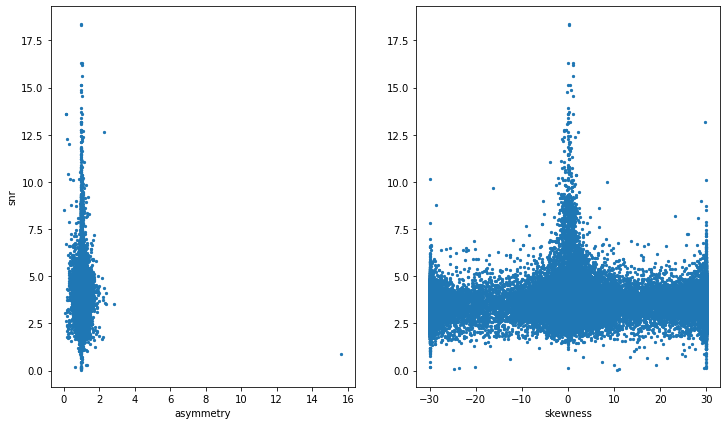

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [5]:
# for i in data.loc[abs(data.skewness >= 10) & abs(data.skewness <= 20)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)
data.head()

path    TIC_ID   signal  \
0  /storage/astro2/phrdhx/s10test/0000/6787/3070/...  67873070 -8.44170   
1  /storage/astro2/phrdhx/s10test/0000/1544/5488/...  15445488 -5.90197   
2  /storage/astro2/phrdhx/s10test/0000/0946/5085/...   9465085 -6.17175   
3  /storage/astro2/phrdhx/s10test/0000/4589/3843/...  45893843 -7.49343   
4  /storage/astro2/phrdhx/s10test/0000/2343/3788/...  23433788 -4.90918   

       snr        time  asym_score  amplitude    width  skewness  \
0 -2.59769  1578.26462     1.00923    0.00413  0.27671   1.69906   
1 -4.43870  1594.41082     1.10058    0.00609  0.10548   3.43810   
2 -4.71280  1592.70382     1.03844    0.00297  0.04666  -1.69862   
3 -4.78364  1572.72117     1.12724    0.01233  0.99966 -30.00000   
4 -3.43937  1593.07766     1.26029    0.00175  0.39637 -15.50007   

   skewness_err  ...     n  chisq_gauss  chisq_skew  rchisq_gauss  \
0       1.43642  ...   329    833.55717   826.82478       6.83244   
1       3.22393  ...  1104    139.45389   127.57102       6.97269   
2       1.33299  ...  1022      3.81621     3.74046       0.19081   
3      49.30605  ...    63    220.44219   192.14236       2.00402   
4      20.67870  ...  1040    174.11504   138.38184       3.48230   

   rchisq_skew  rmse_gauss  rmse_skew  mae_gauss  mae_skew  transit_prob  
0      6.77725     0.00297    0.00295    0.00233   0.00232  maybeTransit  
1      6.37855     0.01130    0.01077    0.00826   0.00745  maybeTransit  
2      0.18702     0.00447    0.00438    0.00376   0.00355  maybeTransit  
3      1.74675     0.00804    0.00757    0.00642   0.00594  maybeTransit  
4      2.76764     0.00194    0.00173    0.00147   0.00134  maybeTransit  

[5 rows x 25 columns]

### Distribution of Asymmetry vs SNR, and Skewness vs SNR

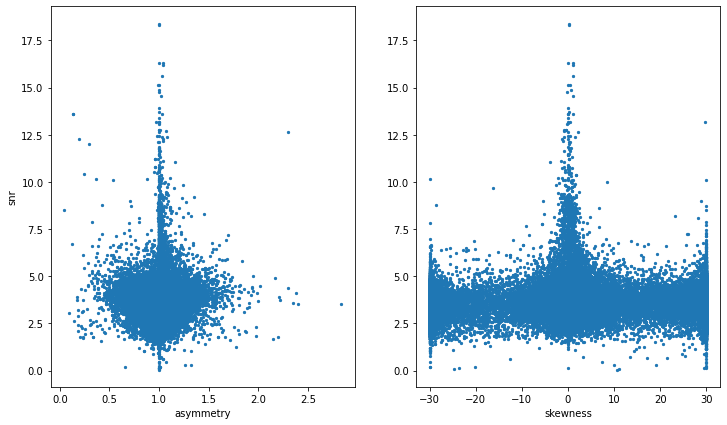

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

#### Histogram of time and duration

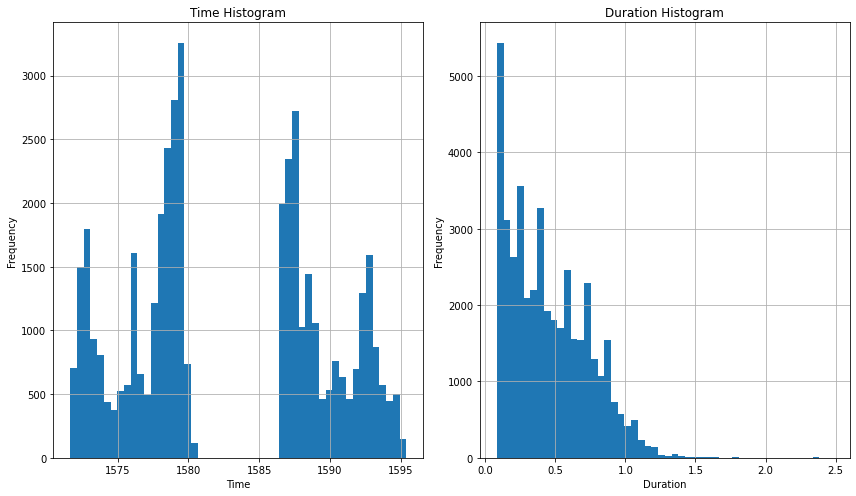

In [8]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

#### 2D Histogram of time and duration

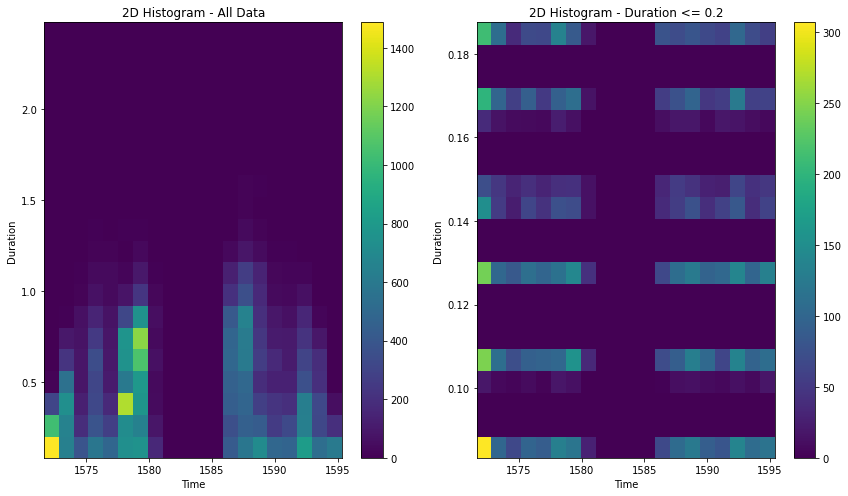

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first hist2d on the first subplot
h1 = ax1.hist2d(data['time'], data['duration'], bins=[20, 20])
ax1.set_title('2D Histogram - All Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Duration')
plt.colorbar(h1[3], ax=ax1)

# Plot the second hist2d on the second subplot
filtered_data = data[data.duration <= 0.2]
h2 = ax2.hist2d(filtered_data['time'], filtered_data['duration'], bins=[20, 20])
ax2.set_title('2D Histogram - Duration <= 0.2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Duration')
plt.colorbar(h2[3], ax=ax2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Alternative visualisation

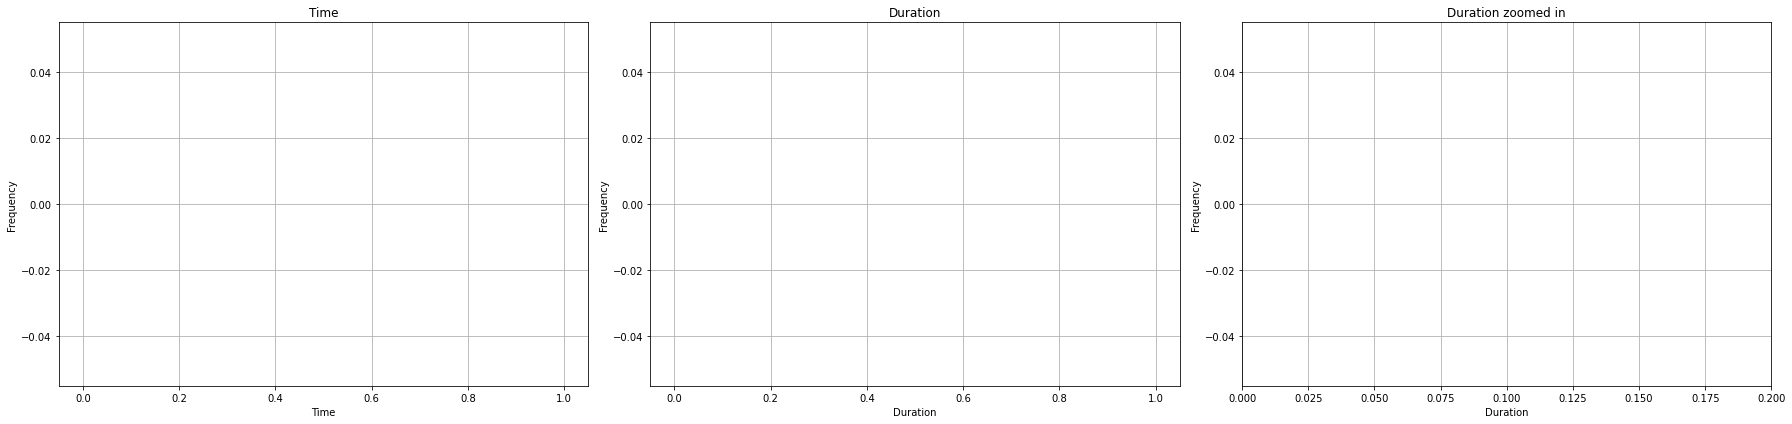

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,6))

# Plot the first histogram on the first subplot
data.loc[(data.time >= 1472) & (data.time <= 1475)].hist('time', bins=50, ax=ax1)
ax1.set_title('Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

# Plot the second histogram on the second subplot
data.loc[(data.time >= 1472) & (data.time <= 1475)].hist('duration', bins=50, ax=ax2)
ax2.set_title('Duration')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Frequency')

data.loc[(data.time >=1473) & (data.time <= 1473.5)].hist('duration',bins=50,ax=ax3)
ax3.set_title('Duration zoomed in')
ax3.set_xlabel('Duration')
ax3.set_ylabel('Frequency')
ax3.set_xlim([0,0.2])

plt.tight_layout()
plt.show()

There is a second spike around 0.3 days... Proven in `asym_score vs depth` plots

In [11]:
data.drop(data[(data['duration'] <= 0.15) & (data['time'] >= 1473.433) & (data['time'] <= 1473.5)].index,inplace=True)

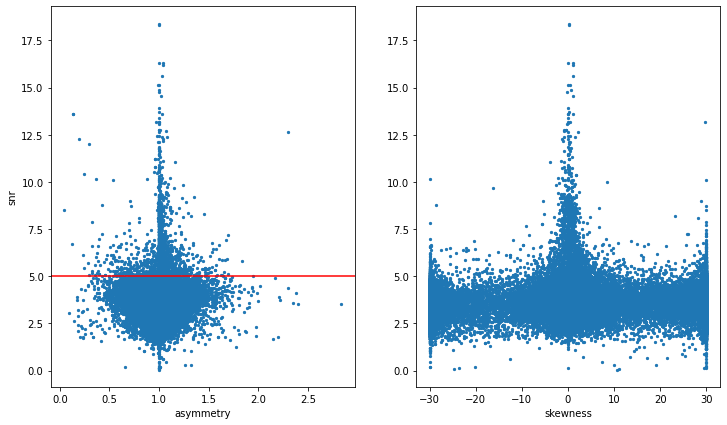

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].axhline(5,c='red')

plt.show()

---

## SNR cut

In [14]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)

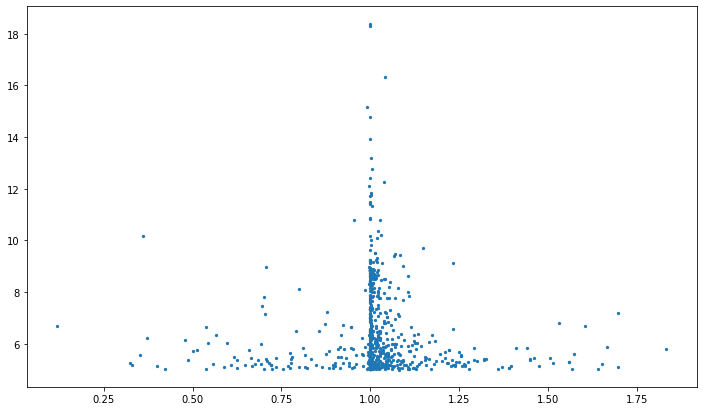

In [16]:
plt.scatter(data_new['asym_score'],abs(data_new.snr),s=5)

In [16]:
# for i in data.loc[abs(data.asym_score >= 1) & abs(data.asym_score <= 1.2)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

---
## Other property cuts

### Import EB catalogue

In [20]:
ebs = pd.read_csv('../catalogs/eb_cat.txt')
tois = pd.read_csv('../catalogs/exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [21]:
data_new

path    TIC_ID    signal  \
0    /storage/astro2/phrdhx/s10test/0000/2513/2277/...  25132277 -17.57920   
1    /storage/astro2/phrdhx/s10test/0000/4578/5689/...  45785689 -32.32038   
2    /storage/astro2/phrdhx/s10test/0000/4578/5576/...  45785576 -25.78067   
3    /storage/astro2/phrdhx/s10test/0000/8945/8914/...  89458914  -5.21529   
4    /storage/astro2/phrdhx/s10test/0000/8093/3588/...  80933588 -11.72251   
..                                                 ...       ...       ...   
688  /storage/astro2/phrdhx/s10test/0000/4578/4997/...  45784997 -15.40677   
689  /storage/astro2/phrdhx/s10test/0000/9417/9222/...  94179222 -13.11133   
690  /storage/astro2/phrdhx/s10test/0000/4578/5584/...  45785584 -13.35512   
691  /storage/astro2/phrdhx/s10test/0000/7322/4233/...  73224233 -13.44873   
692  /storage/astro2/phrdhx/s10test/0000/8185/0253/...  81850253  -9.90189   

         snr        time  asym_score  amplitude    width  skewness  \
0   -5.36438  1586.82265     1.22962    0.02232  0.55412   7.03890   
1   -8.83363  1577.78377     0.99992    0.03389  0.12891   0.00229   
2   -8.23576  1577.80461     1.00134    0.01005  0.12770   0.57425   
3   -5.24126  1589.03330     1.01178    0.00714  0.98867  -9.31527   
4   -5.56351  1572.01452     0.99989    0.00941  0.07232   0.00115   
..       ...         ...         ...        ...      ...       ...   
688 -6.68823  1577.76294     1.01490    0.00444  0.20397   2.31906   
689 -6.47789  1575.57738     0.99997    0.02822  0.05733   0.37301   
690 -6.31795  1577.78377     1.02164    0.00033  0.08640   1.34294   
691 -5.12165  1591.95288     1.01630    0.06050  0.32023   3.40405   
692 -5.72846  1571.91041     0.88356    0.02994  0.37952  -2.78806   

     skewness_err  ...    n  chisq_gauss   chisq_skew  rchisq_gauss  \
0         2.64598  ...  740    260.08940    205.79412       1.52994   
1     10748.21134  ...  306    353.10497    353.07567       3.39524   
2         0.73444  ...  307     83.73312     83.62192       0.85442   
3        32.60099  ...  846    831.54510    820.73376      25.98578   
4    751627.91180  ...   29     48.55511     48.54900       1.10353   
..            ...  ...  ...          ...          ...           ...   
688       1.11407  ...  305    147.36687    145.20746       1.33970   
689       5.83540  ...  200    329.35944    329.32940       6.58719   
690       0.68573  ...  306  33877.75583  33181.79122    1058.67987   
691       2.05168  ...  986   2104.09896   2066.96516      10.52049   
692       0.72555  ...   24     50.43465     39.30764       1.14624   

     rchisq_skew  rmse_gauss  rmse_skew  mae_gauss  mae_skew  transit_prob  
0        1.21055     0.00840    0.00758    0.00646   0.00547  maybeTransit  
1        3.39496     0.00180    0.00180    0.00140   0.00140  maybeTransit  
2        0.85328     0.00186    0.00186    0.00140   0.00140  maybeTransit  
3       25.64793     0.00398    0.00396    0.00341   0.00341  maybeTransit  
4        1.10339     0.01068    0.01068    0.00805   0.00804  maybeTransit  
..           ...         ...        ...        ...       ...           ...  
688      1.32007     0.00272    0.00270    0.00225   0.00222  maybeTransit  
689      6.58659     0.02971    0.02971    0.02424   0.02423  maybeTransit  
690   1036.93098     0.00018    0.00018    0.00013   0.00013  maybeTransit  
691     10.33483     0.04390    0.04355    0.03269   0.03230  maybeTransit  
692      0.89336     0.00798    0.00849    0.00634   0.00623  maybeTransit  

[693 rows x 25 columns]

In [22]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [23]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [24]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

In [25]:
len(data_new)

693

### Duration vs depth

In [26]:
frac_dur = data_new.duration[(data_new.is_eb == False) & (data_new.is_toi == False)]
frac_depth = data_new.depth[(data_new.is_eb == False) & (data_new.is_toi == False)]

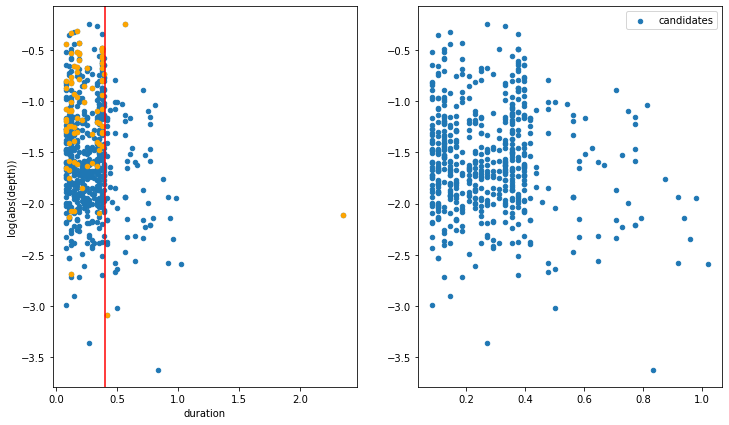

In [27]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates',zorder=1)
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs')
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

In [28]:
len(ebs_found[ebs_found.duration > 0.4]) / len(ebs_found)

0.03614457831325301

### Duration vs Peak_lspower

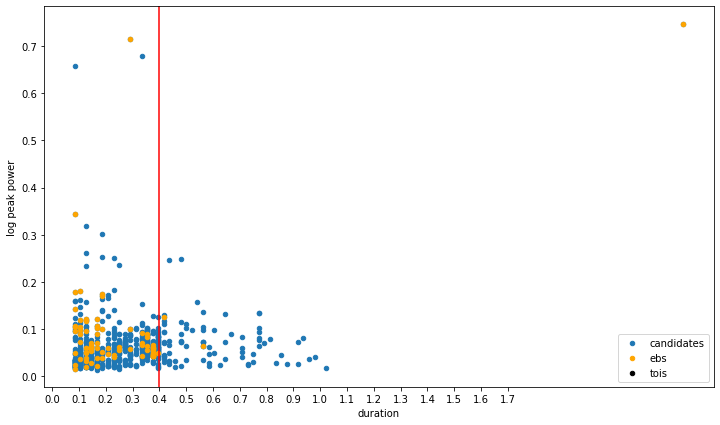

In [29]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

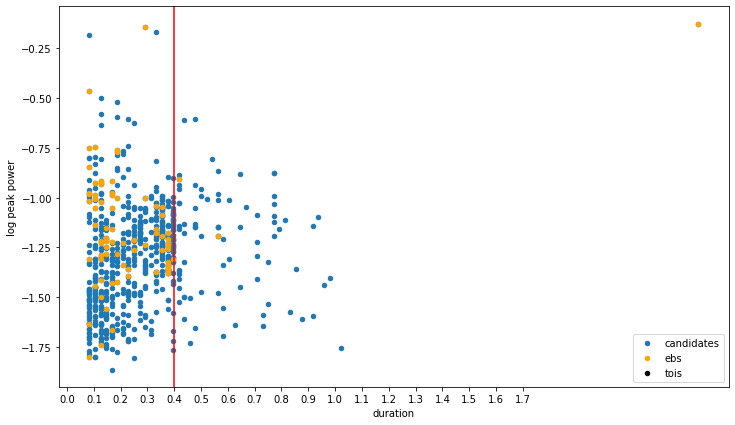

In [30]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [31]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

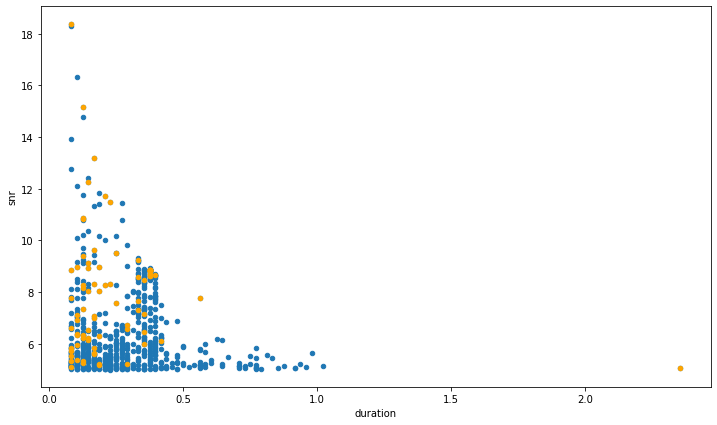

In [32]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

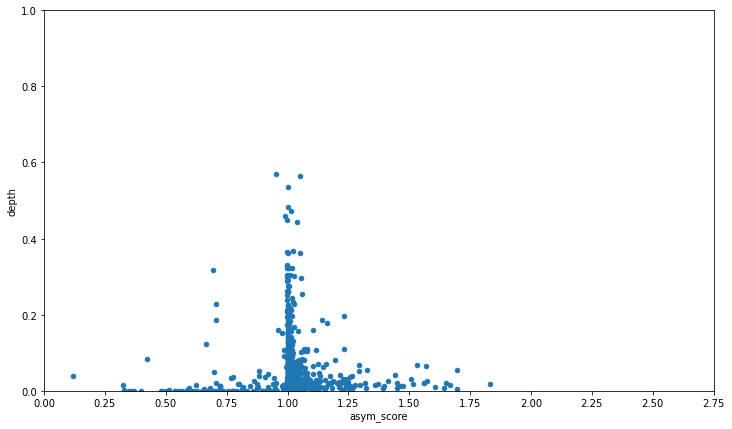

In [33]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [34]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

In [35]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

UnboundLocalError: local variable 'lc' referenced before assignment

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

686


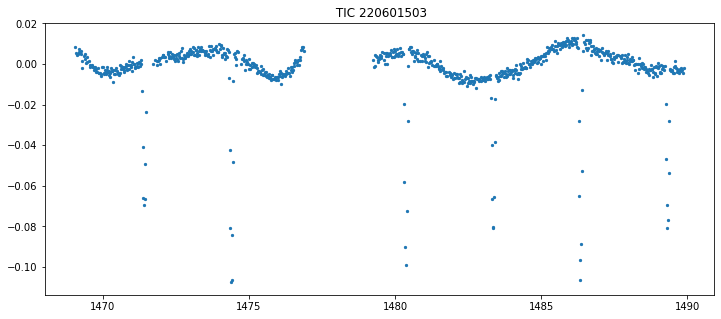

686


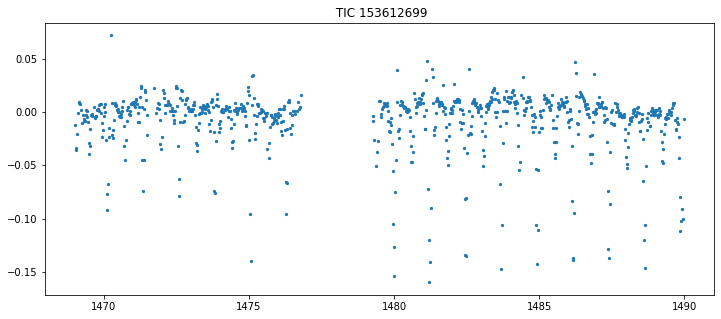

In [33]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [34]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [35]:
data_new.head()

path     TIC_ID    signal  \
21  /tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...  156733062  -9.68575   
22  /tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...  148095873 -19.84347   
26  /tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...    7493260  -5.14878   
29  /tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...  153696533 -11.63052   
30  /tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...  263942344  -9.31620   

        snr        time  asym_score  amplitude    width  skewness  \
21 -5.15504  1473.41234     0.83606    0.00015  0.13929 -18.76983   
22 -6.10875  1471.22181     0.86666    0.00376  0.54594   3.88776   
26 -5.00282  1473.13823     1.00629    0.00013  0.70461  25.05635   
29 -5.33044  1481.89146     0.99999    0.00046  0.13990   0.00293   
30 -5.11735  1487.12065     1.02605    0.00103  0.42559  14.09656   

    skewness_err  ...  chisq_skew  rchisq_gauss  rchisq_skew  rmse_gauss  \
21      85.68538  ...   249.89109       1.21281      1.52373     0.00082   
22       1.34668  ...   219.62172       1.58127      1.39001     0.00122   
26     114.60966  ...   244.25964       0.84542      0.84227     0.00029   
29  100879.24432  ...   163.11439       1.40617      1.40616     0.00036   
30      14.50880  ...   936.55192       4.40815      4.29611     0.00083   

    rmse_skew  mae_gauss  mae_skew  transit_prob  is_eb  is_toi  
21    0.00090    0.00062   0.00061  maybeTransit  False   False  
22    0.00131    0.00094   0.00101  maybeTransit  False   False  
26    0.00029    0.00023   0.00023  maybeTransit  False   False  
29    0.00036    0.00027   0.00027  maybeTransit  False   False  
30    0.00082    0.00065   0.00063  maybeTransit  False   False  

[5 rows x 27 columns]

### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [36]:
from matplotlib.colors import ListedColormap

In [37]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

In [36]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlim([-0.1,2])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

NameError: name 'custom_cmap' is not defined

In [39]:
len(data_new)

923

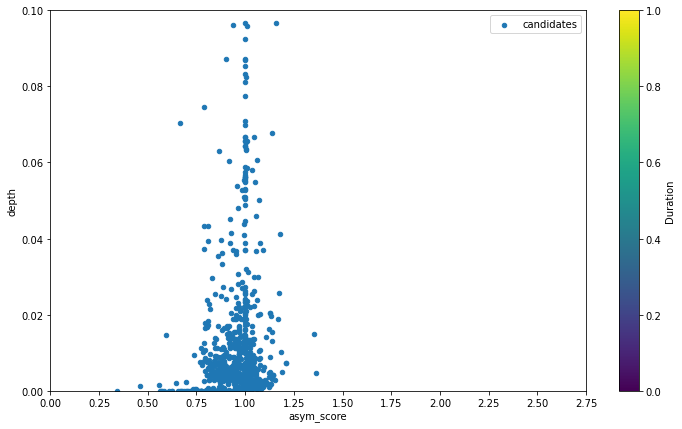

In [40]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

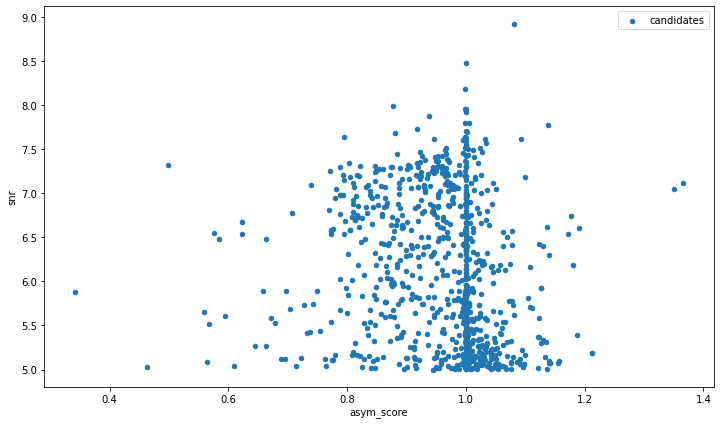

In [41]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

In [37]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

NameError: name 'custom_cmap' is not defined

### Remove all lightcurves between 1473 and 1475

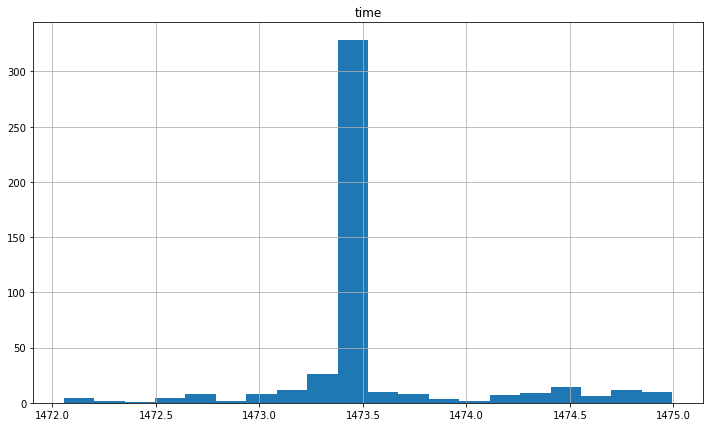

In [43]:
hist_data = data_new.loc[(data_new.time >= 1472) & (data_new.time <= 1475)].hist('time', bins=20)

In [44]:
#data_new.drop(data_new[(data_new.time >= 1473) & (data_new.time <= 1473.5)].index,inplace=True)

## Make SOM Cutouts

In [45]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [46]:
from tqdm import tqdm

In [47]:
os.chdir('../')

100%|██████████| 923/923 [04:53<00:00,  3.15it/s]  


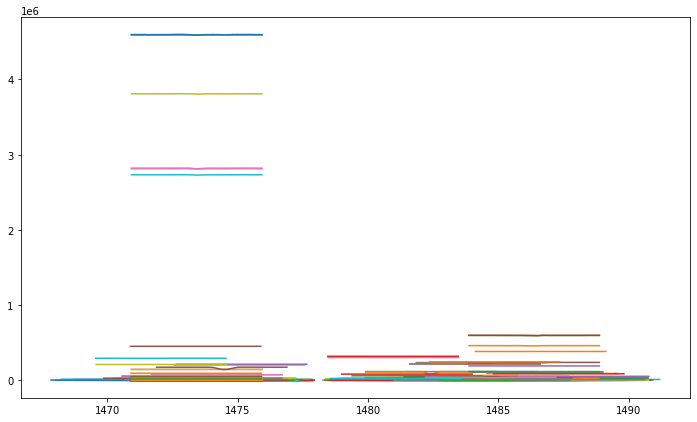

In [49]:
for i in tqdm(data_new.path):
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)

---

### Rough visuals

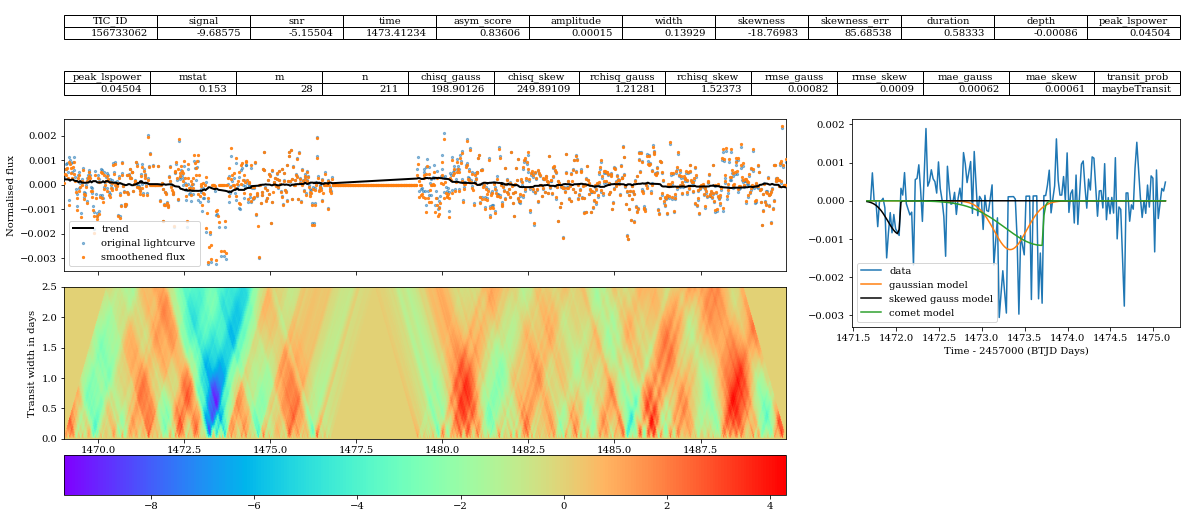

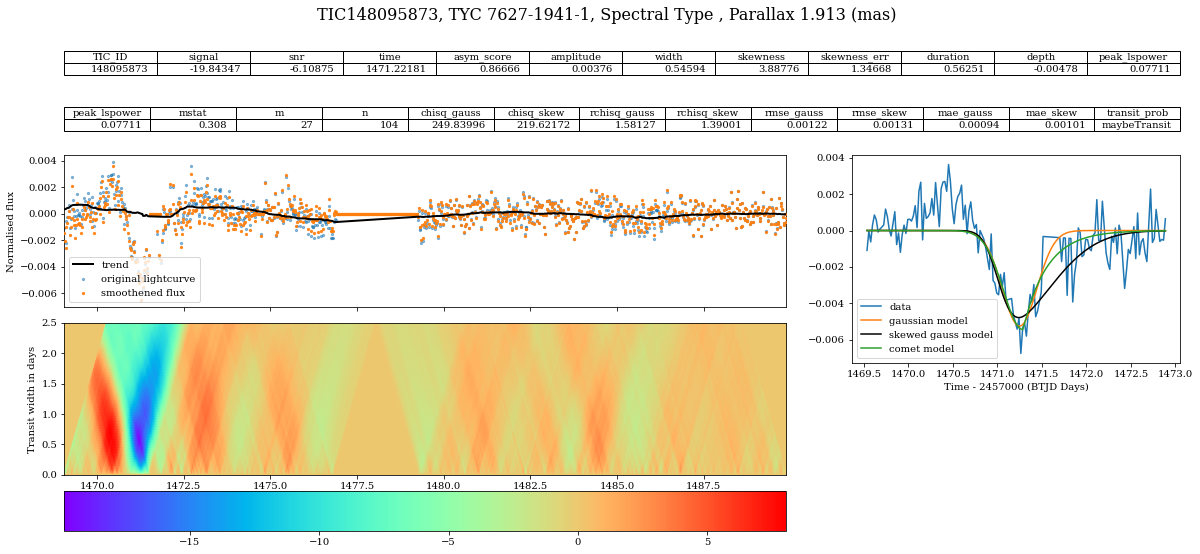

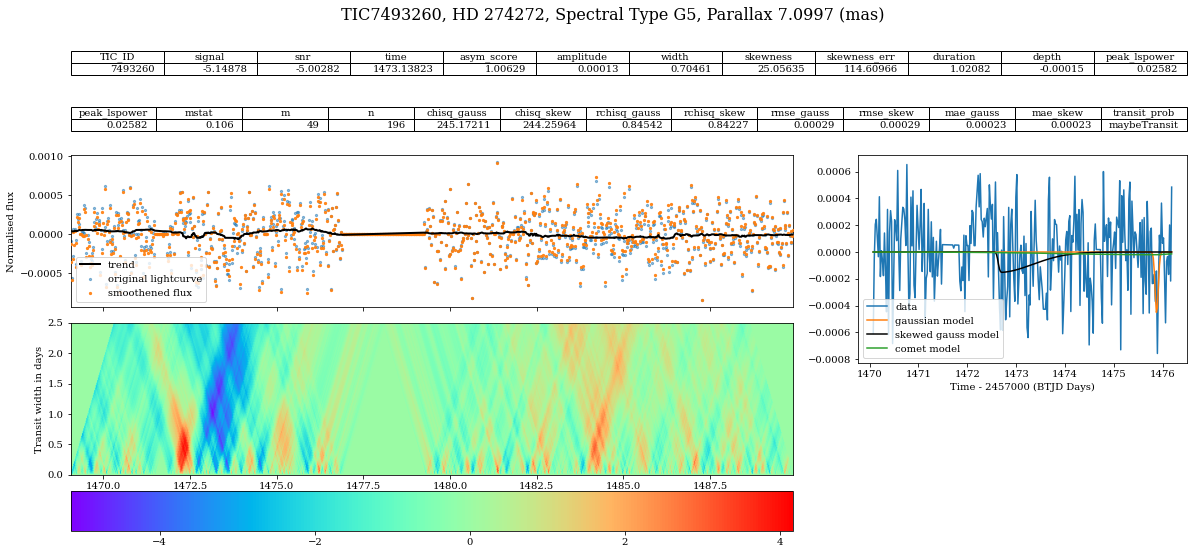

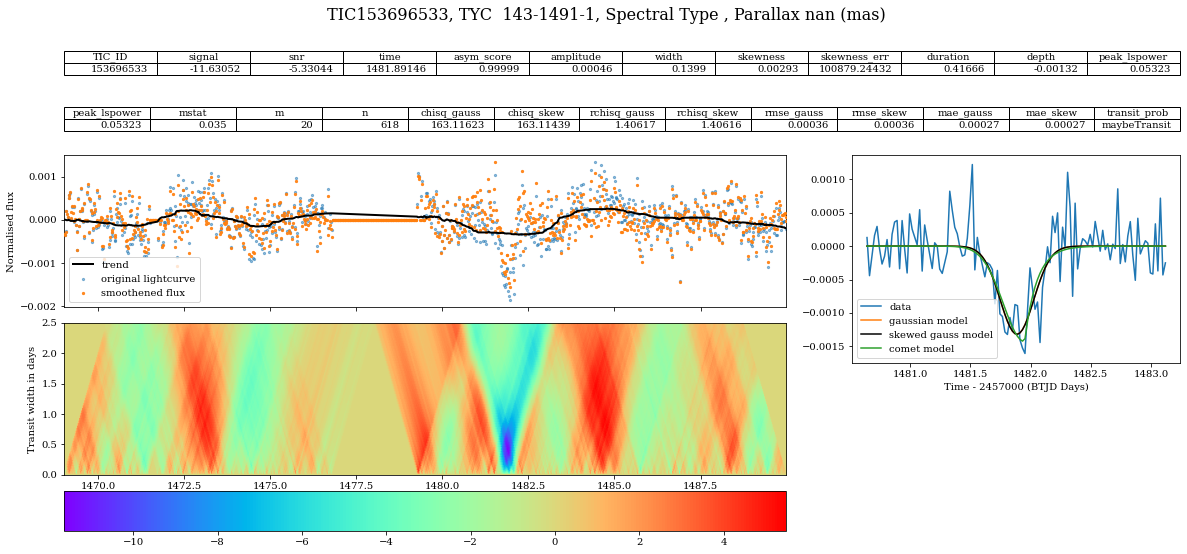

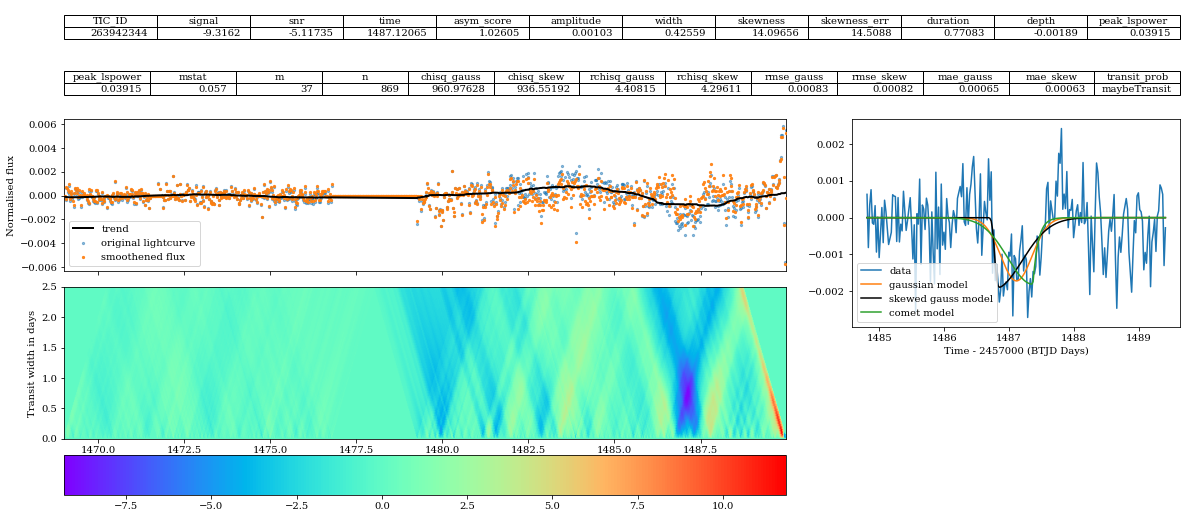

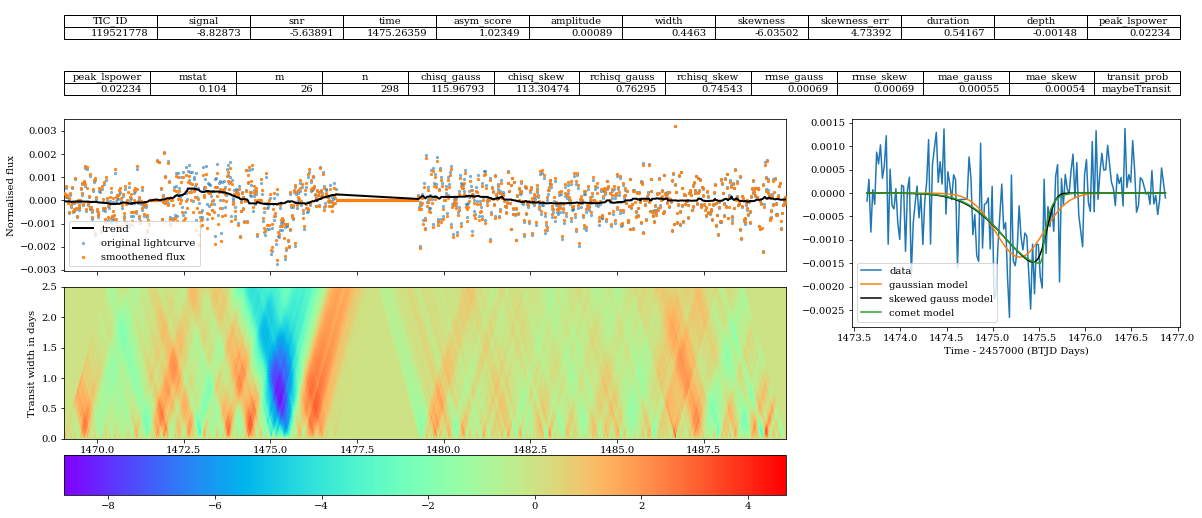

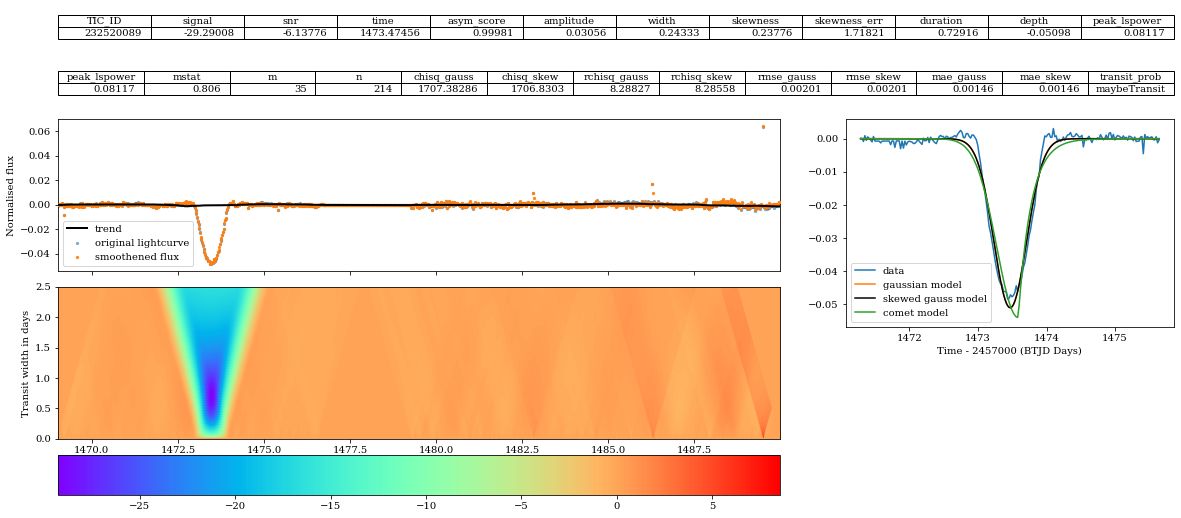

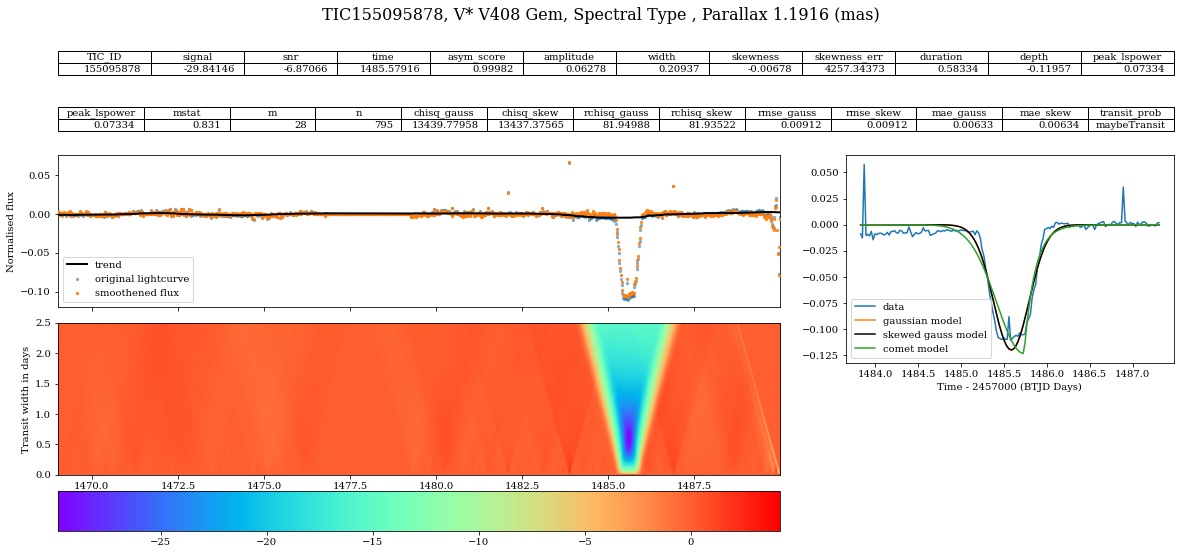

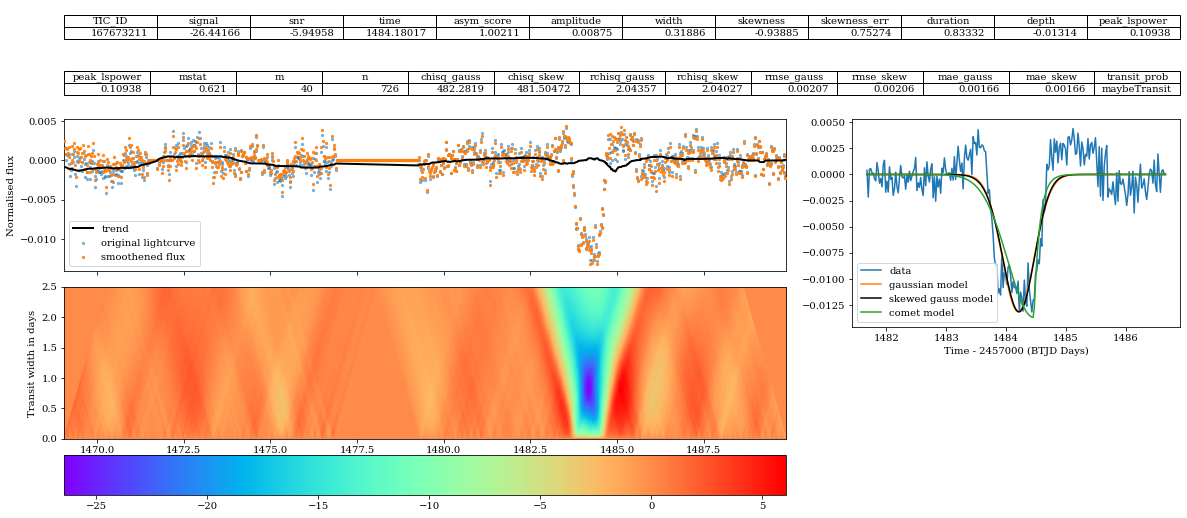

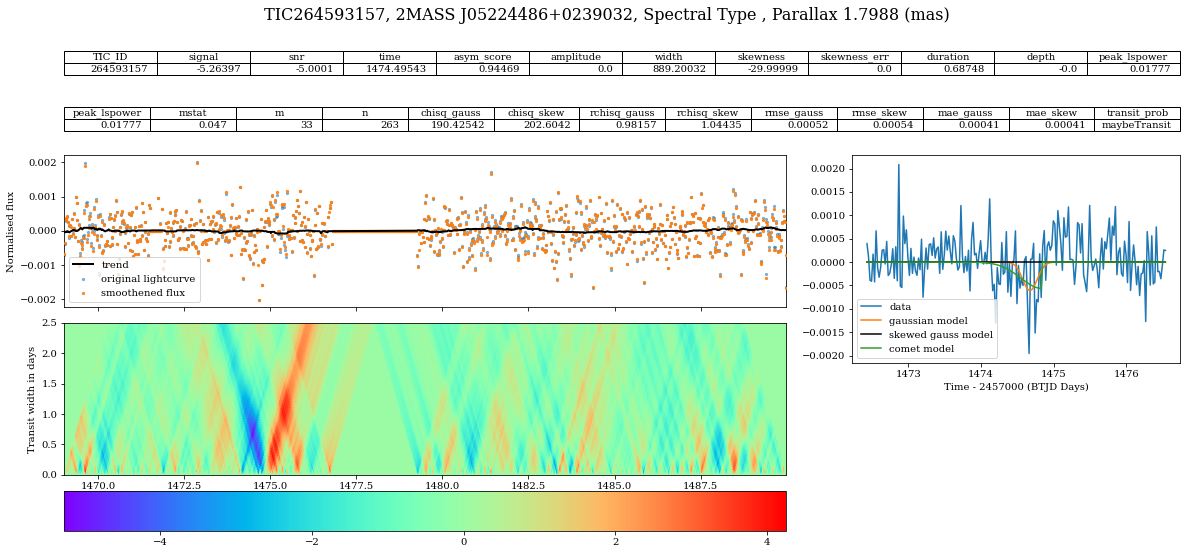

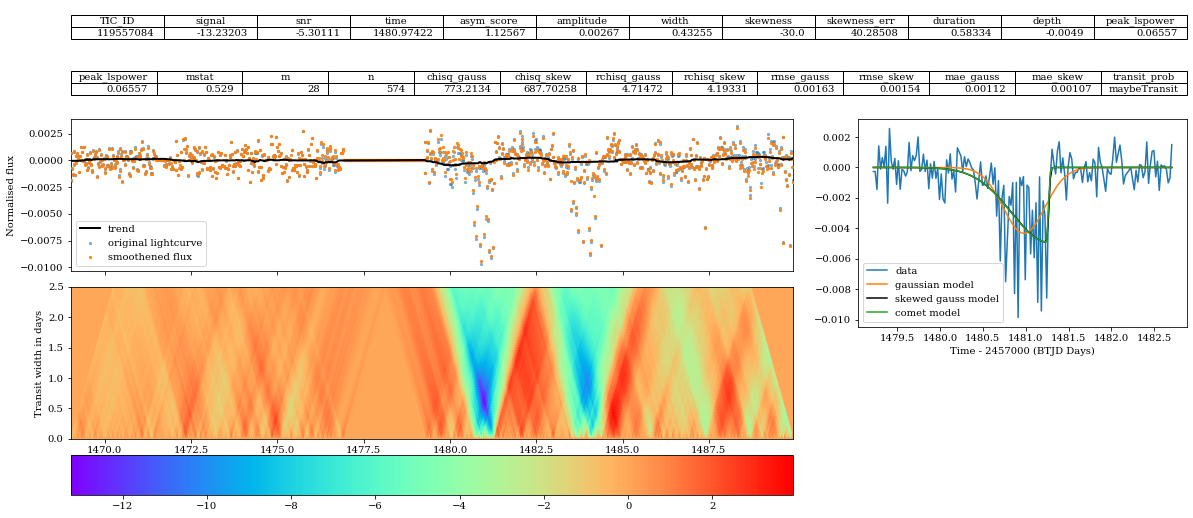

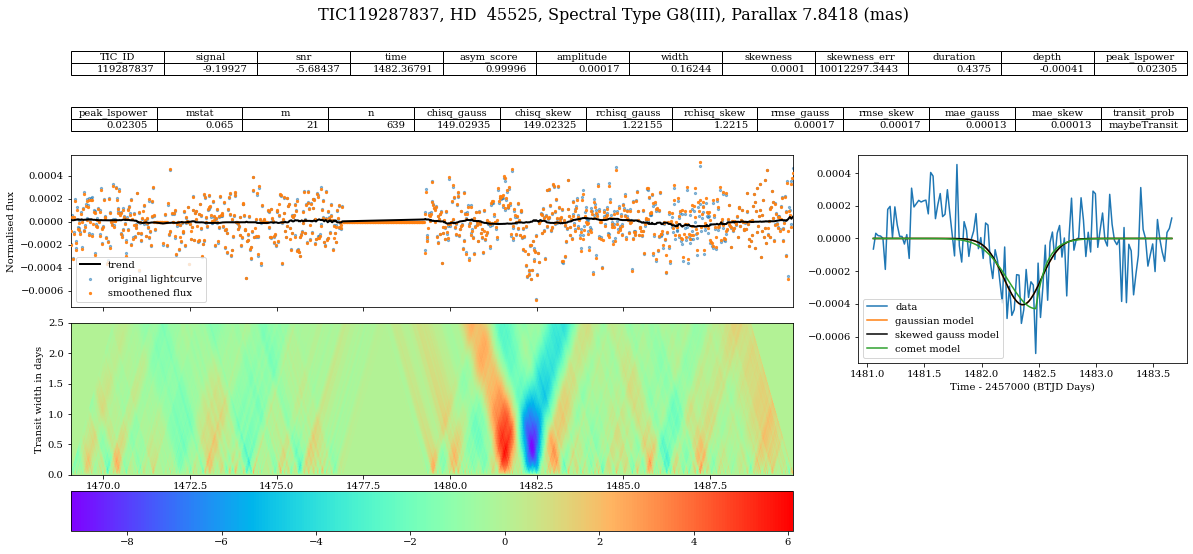

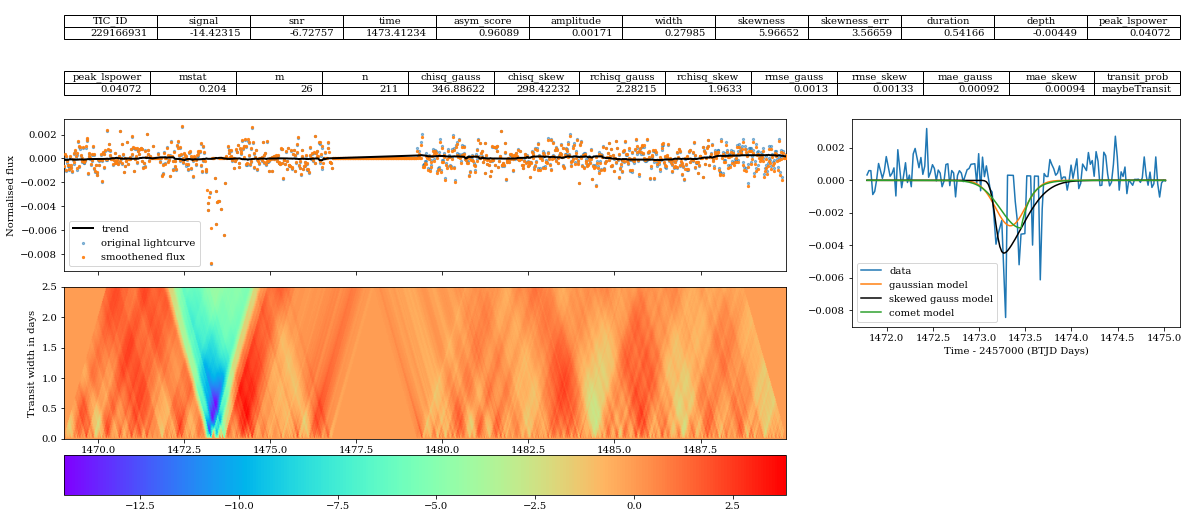

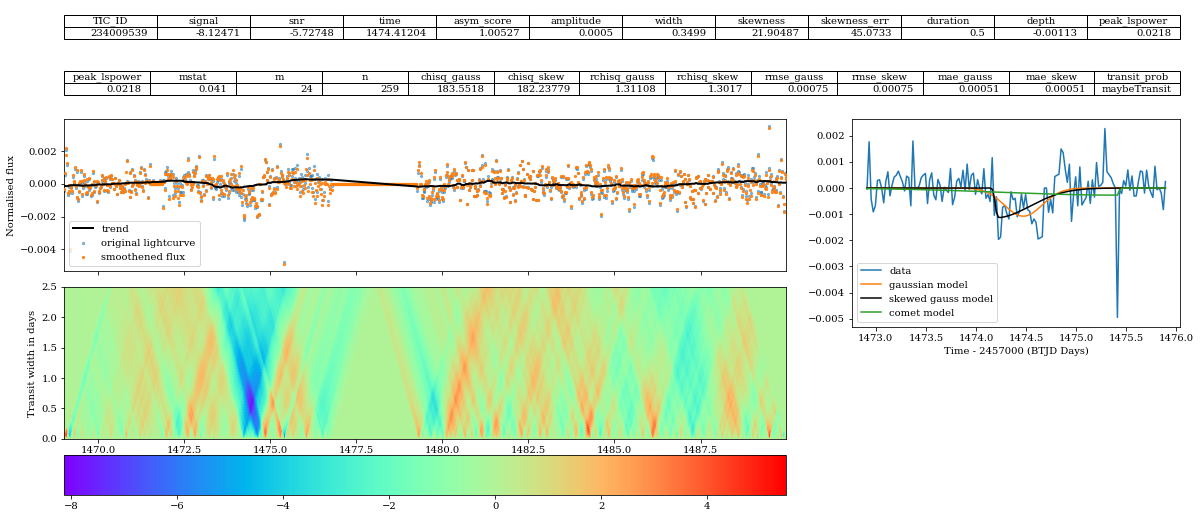

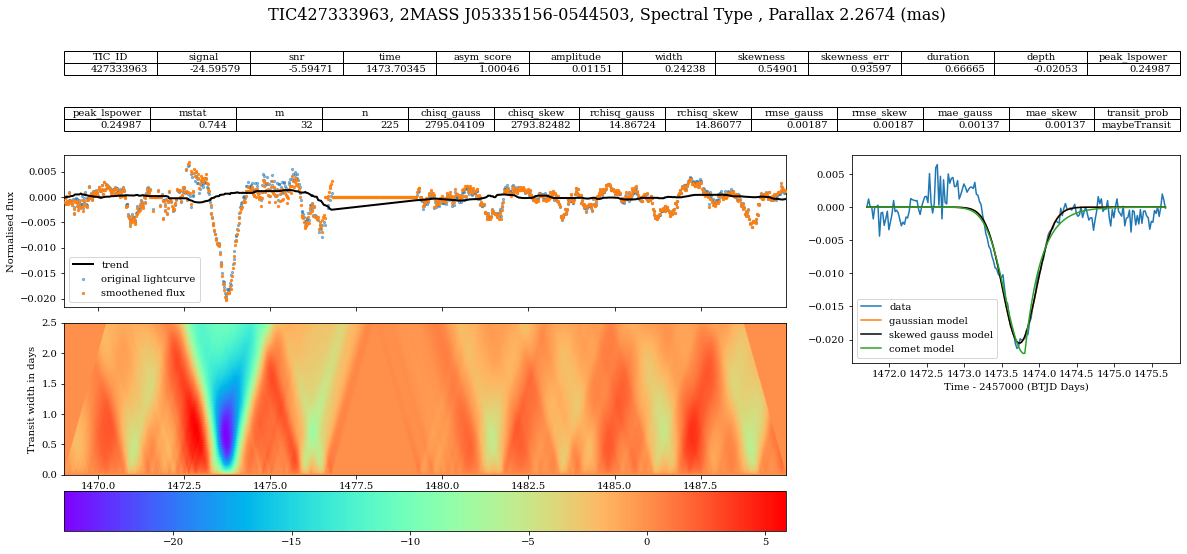

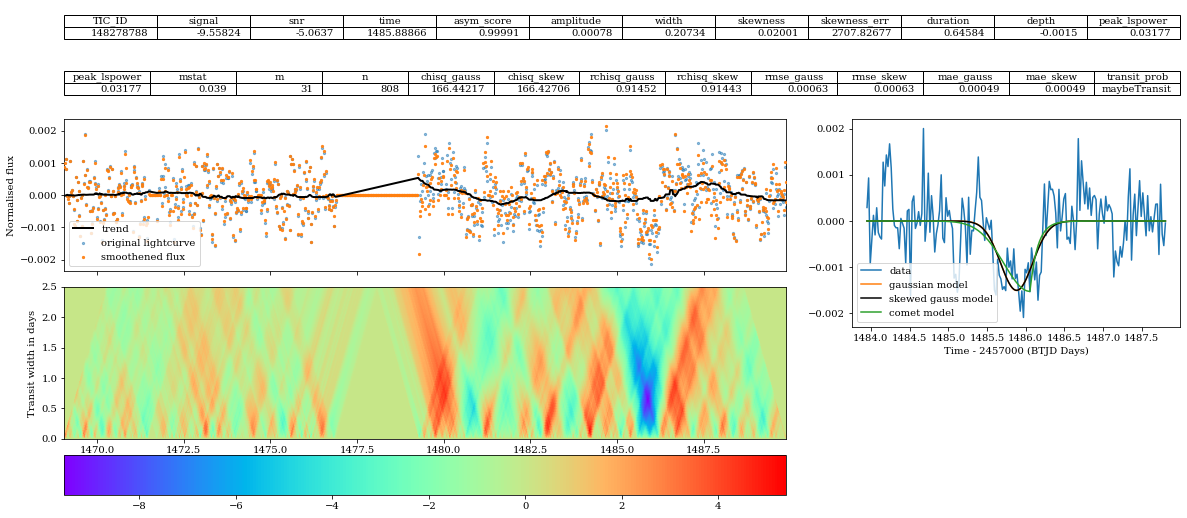

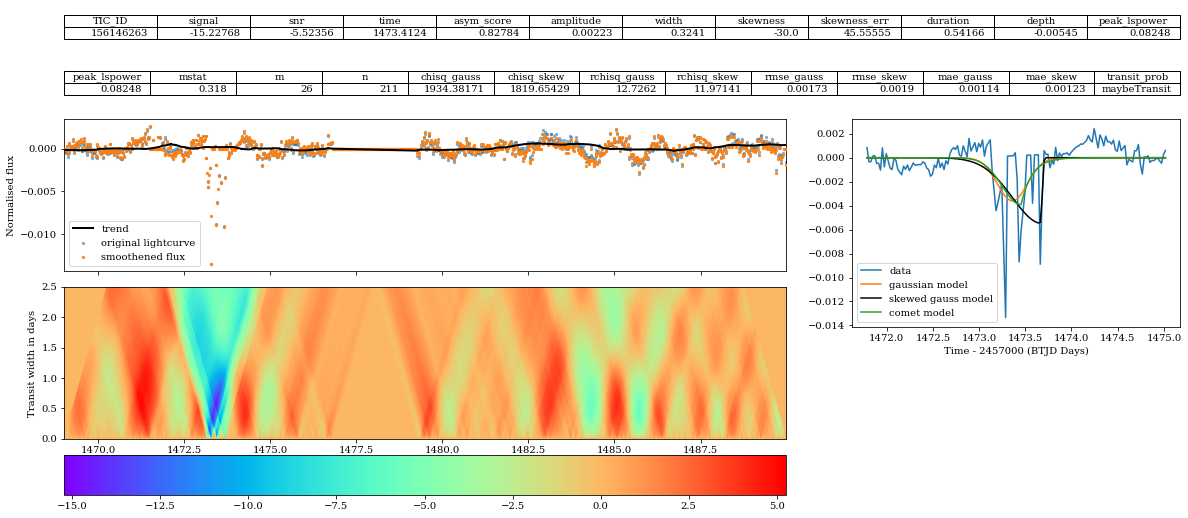

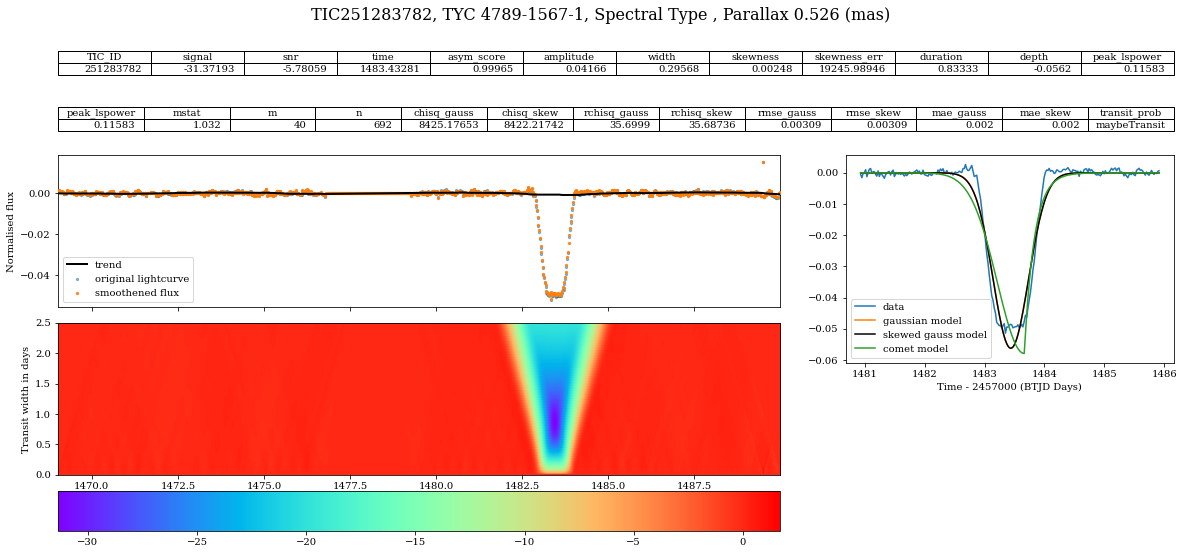

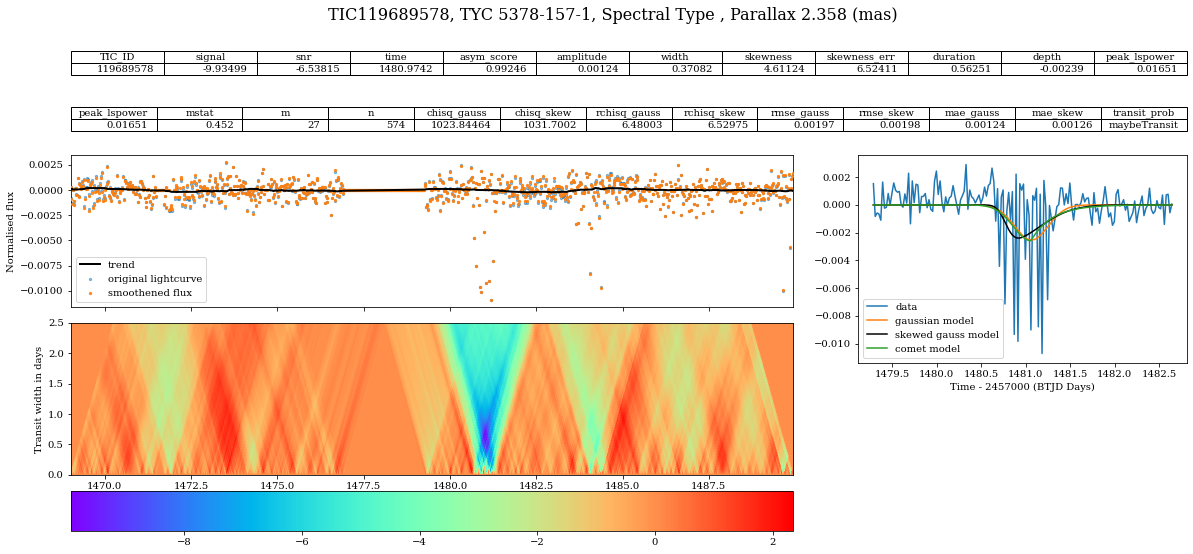

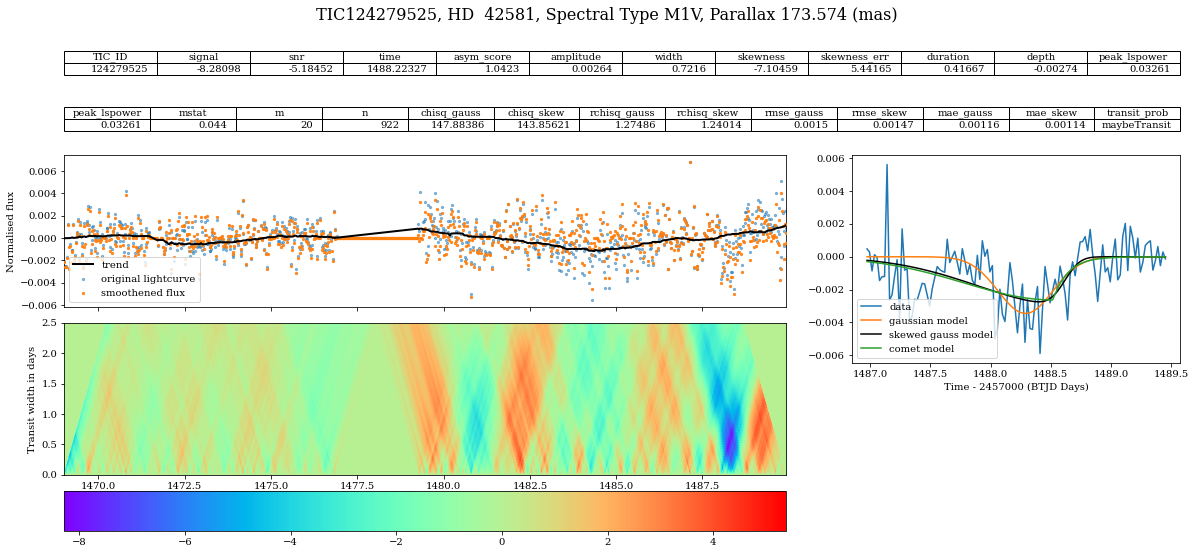

In [46]:
os.chdir('scripts/')
for i in data_new.path.head(20):
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [47]:
data_new[data_new.TIC_ID == 445945899].path.values[0]

'/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11_12/tesslc_445945899.pkl'

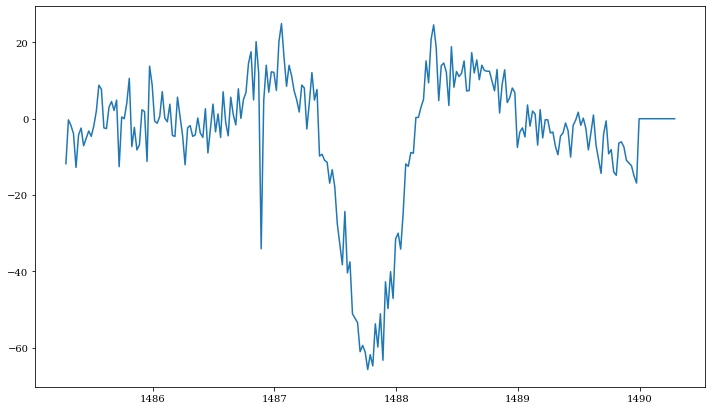

In [50]:
lc, lc_info = import_XRPlightcurve(data_new[data_new.TIC_ID == 445945899].path.values[0],sector=6)
lc = lc['time','corrected flux','quality','flux error']
results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)

In [61]:
a = normalise_flux(lc['corrected flux'])

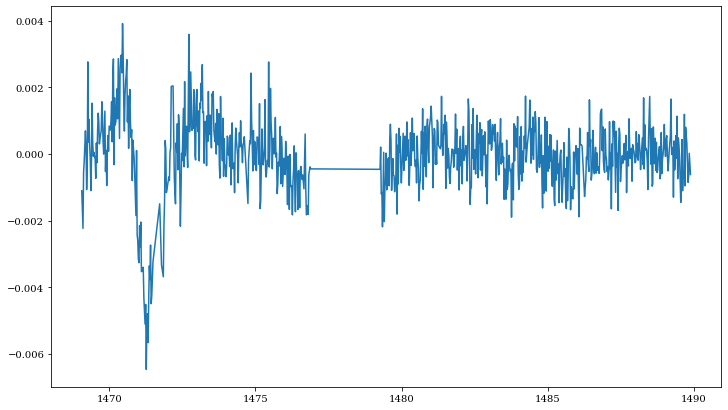

In [62]:
plt.plot(lc['time'],a)

In [56]:
def create_som_cutout_test(table, min_T: float, half_cutout_length=120):
    """creates cutout of lightcurve to prepare for SOM. The SOM requires all lightcurves to be the same length.

    inputs:
    :table (pd.DataFrame or astropy.table): The input lightcurve data from which the cutout will be created. If the table is in an astropy format, it will be converted.
    :min_T (numeric): the time value around which the cutout will be centered.
    :half_cutout_length (optional, numeric): the size of half the window desired in number of cadences.

    returns:
    :cutout (pd.DataFrame): a sliced lightcurve with exactly 240 points, centered on min_T.
    """

    if not isinstance(table, pd.DataFrame):
        table = table.to_pandas()

    time_values = table["time"].values
    min_time = np.min(time_values)
    max_time = np.max(time_values)

    target_min_index = np.searchsorted(time_values, min_T) - half_cutout_length
    target_max_index = target_min_index + 2 * half_cutout_length

    if target_min_index < 0 or target_max_index >= len(time_values):
        # Extrapolation is required

        # Interpolate the existing data
        interpolator = interp1d(time_values, table["flux"].values, kind='linear',fill_value="extrapolate")

        # Generate the extrapolated time values
        cadence_duration = time_values[1] - time_values[0]
        extrapolated_times = np.linspace(
            min_T - half_cutout_length * cadence_duration,
            min_T + half_cutout_length * cadence_duration,
            2 * half_cutout_length + 1,
        )

        # Interpolate the extrapolated flux values
        extrapolated_flux = interpolator(extrapolated_times)
        
        
        extrapolated_mask = np.logical_or(
            extrapolated_times < min_time, extrapolated_times > max_time
        )

        # Assign extrapolated points with the median of the cutout
        median_flux = np.median(table["flux"].values)
        extrapolated_flux[extrapolated_mask] = median_flux
        

        # Create a new DataFrame with the extrapolated data
        extrapolated_table = pd.DataFrame({'time': extrapolated_times, 'flux': extrapolated_flux})

        # Extract the cutout around the min_T value
        cutout = extrapolated_table.iloc[
            np.searchsorted(extrapolated_table["time"].values, min_T)
            - half_cutout_length : np.searchsorted(
                extrapolated_table["time"].values, min_T
            )
            + half_cutout_length
            + 1
        ]
    else:
        # No extrapolation needed, extract the cutout directly
        cutout = table.iloc[target_min_index : target_max_index + 1]

    return cutout

In [57]:
lc, lc_info = import_XRPlightcurve('/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11_12/tesslc_148095873.pkl',sector=6)
lc = lc['time','corrected flux','quality','flux error']
lc['flux'] = lc['corrected flux']

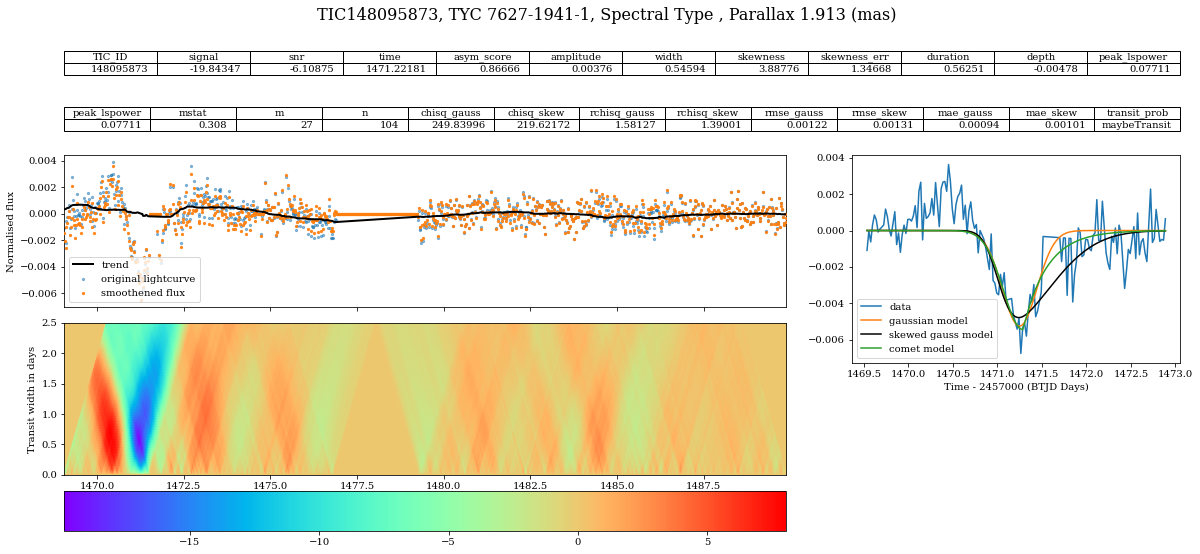

In [53]:
_, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [58]:
test = create_som_cutout_test(lc, min_T=1471.22181, half_cutout_length=120)

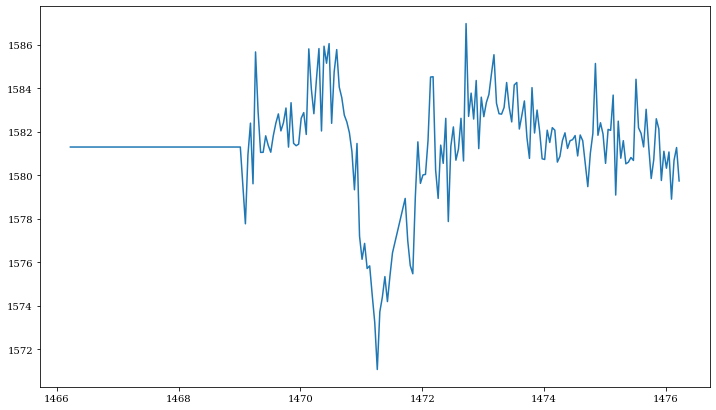

In [59]:
plt.plot(test['time'],test['flux'])